In [76]:
import numpy as np

In [77]:
import matplotlib.pyplot as plt

In [78]:
import scipy as sp

In [79]:
with open('npt.out.dump','r') as f:
    data=f.readlines()
total_atoms=int(data[3].strip())

In [80]:
number_of_bins=100
number_of_frames=100

def pairwise_distance_between_atoms(i,j,box_size):
    distance_x=abs(i[0]-j[0])
    distance_x=min(distance_x,abs(box_size-distance_x))
    distance_y=abs(i[1]-j[1])
    distance_y=min(distance_y,abs(box_size-distance_y))
    distance_z=abs(i[2]-j[2])
    distance_z=min(distance_z,abs(box_size-distance_z))
    return np.lib.scimath.sqrt(distance_x**2+distance_y**2+distance_z**2)


In [81]:
def find_coordinates(data,start,end,box_size):
    coordinates=[]
    for k in data[start:end]:
        l=k.split()
        if int(l[1])==1:
                coordinates.append([float(l[2])*box_size,float(l[3])*box_size,float(l[4])*box_size])
    return coordinates

In [82]:
def find_box_size(data,i):
    l=data[i].split()
    return float(l[1])-float(l[0])

In [83]:
def distribution_of_particles():
    distribution_data=np.zeros(number_of_bins)
    box_set=[]
    increment_set=[]
    for k in range(0,number_of_frames):
        start=k*number_atoms+(k+1)*9
        end=start+total_atoms
        coordinates=[]
        box_size=find_box_size(data,start-2)
        box_set.append(box_size)
        increment=box_size/(2*number_of_bins)
        increment_set.append(increment)
        coordinates=find_coordinates(data,start,end,box_size)
        particles=len(coordinates)
        for i in range(particles-1):
            for j in range(i+1,particles):
                distance=pairwise_distance_between_atoms(coordinates[i],coordinates[j],box_size)
                if distance<(box_size/2):
                    ig=int(distance/increment)
                    distribution_data[ig]=distribution_data[ig]+2
    return distribution_data,box_set,increment_set

distribution_data,box_set,increment_set=distribution_of_particles()
avg_box_size=sum(box_set)/len(box_set)
avg_increment=sum(increment_set)/len(increment_set)


In [84]:
for i in range(number_of_bins):
    r1=i*avg_increment
    r2=r1+avg_increment
    volume_bin=(r2**3-r1**3)*(4/3)*(sp.pi)
    density_bin=(number_atoms)/(avg_box_size**3)
    nid=volume_bin*density_bin
    distribution_data[i]=distribution_data[i]/nid
    distribution_data[i]=distribution_data[i]/total_atoms
    distribution_data[i]=distribution_data[i]/number_of_frames

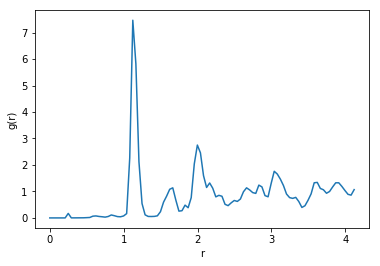

In [85]:
radius=np.linspace(0.0,number_of_bins*avg_increment,number_of_bins)

plt.xlabel('r')
plt.ylabel('g(r)')
plt.plot(radius,distribution_data)
plt.show()


In [86]:
with open('nvt.rdf','r') as f:
    system_data=f.readlines()

In [87]:
x_first=[]
y_first=[]
x_second=[]
y_second=[]
x_third=[]
y_third=[]
def get_system_coordinates(system_data,start,end):
    if start==4:
        for i in system_data[start:end]:
            m=i.split()
            x_first.append(float(m[1]))
            y_first.append(float(m[2]))
    elif start==105:
        for i in system_data[start:end]:
            k=i.split()
            x_second.append(float(k[1]))
            y_second.append(float(k[2]))
    else:
        for i in system_data[start:end]:
            l=i.split()
            x_third.append(float(l[1]))
            y_third.append(float(l[2]))   
get_system_coordinates(system_data,4,104)
get_system_coordinates(system_data,105,205)
get_system_coordinates(system_data,206,305)

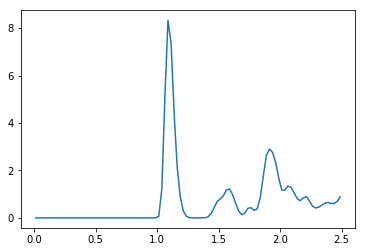

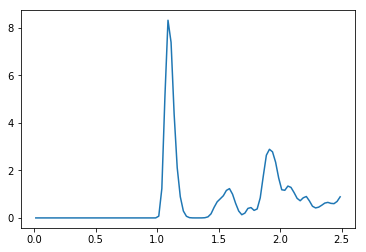

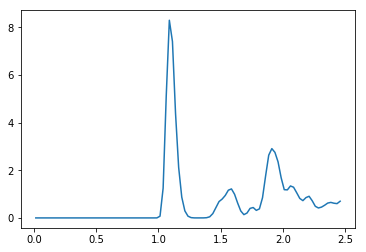

In [88]:
plt.plot(x_first,y_first)
plt.show()
plt.plot(x_second,y_second)
plt.show()
plt.plot(x_third,y_third)
plt.show()